# Frequency and the Fast Fourier Transform

In [45]:
# Make plots appear inline, set custom plotting style
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

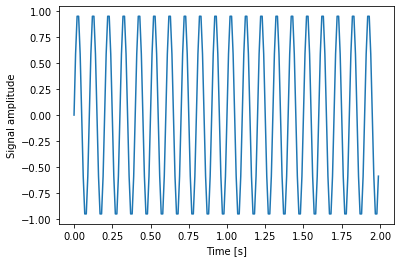

In [46]:
f = 10  # Frequency, in cycles per second, or Hertz
f_s = 100  # Sampling rate, or number of measurements per second

t = np.linspace(0, 2, 2 * f_s, endpoint=False)
x = np.sin(f * 2 * np.pi * t)

fig, ax = plt.subplots()
ax.plot(t, x)
ax.set_xlabel('Time [s]')
ax.set_ylabel('Signal amplitude');

C:\Users\SESA94921\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  if __name__ == '__main__':


(-5, 110)

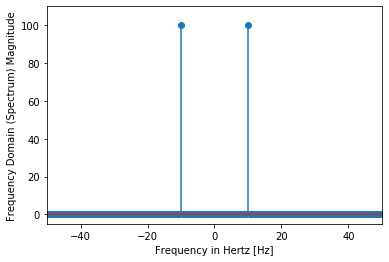

In [47]:
#Let us now examine our sinusoid through application of the DFT:
from scipy import fftpack

X = fftpack.fft(x)
freqs = fftpack.fftfreq(len(x)) * f_s

fig, ax = plt.subplots()

ax.stem(freqs, np.abs(X))
ax.set_xlabel('Frequency in Hertz [Hz]')
ax.set_ylabel('Frequency Domain (Spectrum) Magnitude')
ax.set_xlim(-f_s / 2, f_s / 2)
ax.set_ylim(-5, 110)

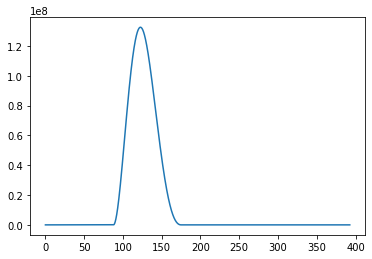

In [48]:
import pandas
import matplotlib.pyplot as plt
#import seaborn
%matplotlib inline

# the OP's data
x = pandas.read_csv('http://pastebin.com/raw.php?i=ksM4FvZS', skiprows=2, header=None).values
y = pandas.read_csv('http://pastebin.com/raw.php?i=0WhjjMkb', skiprows=2, header=None).values
fig, ax = plt.subplots()
ax.plot(x, y)

AttributeError: 'AxesSubplot' object has no attribute 'hold'

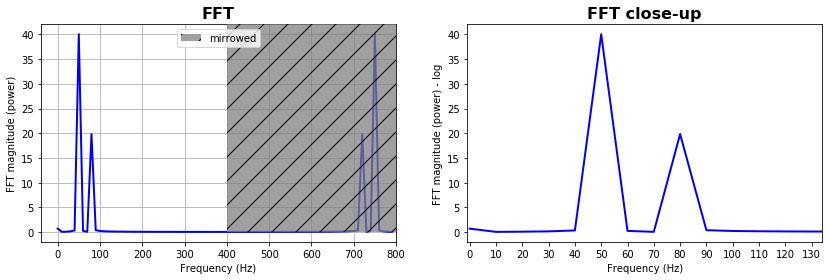

In [32]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import scipy.fftpack

fig = plt.figure(figsize=[14,4])
N = 600           # Number of samplepoints
Fs = 800.0
T = 1.0 / Fs      # N_samps*T (#samples x sample period) is the sample spacing.
N_fft = 80        # Number of bins (chooses granularity)
x = np.linspace(0, N*T, N)     # the interval
y = np.sin(50.0 * 2.0*np.pi*x) + 0.5*np.sin(80.0 * 2.0*np.pi*x)   # the signal

# removing the mean of the signal
mean_removed = np.ones_like(y)*np.mean(y)
y = y - mean_removed

# Compute the fft.
yf = scipy.fftpack.fft(y,n=N_fft)
xf = np.arange(0,Fs,Fs/N_fft)

##### Plot the fft #####
ax = plt.subplot(121)
pt, = ax.plot(xf,np.abs(yf), lw=2.0, c='b')
p = plt.Rectangle((Fs/2, 0), Fs/2, ax.get_ylim()[1], facecolor="grey", fill=True, alpha=0.75, hatch="/", zorder=3)
ax.add_patch(p)
ax.set_xlim((ax.get_xlim()[0],Fs))
ax.set_title('FFT', fontsize= 16, fontweight="bold")
ax.set_ylabel('FFT magnitude (power)')
ax.set_xlabel('Frequency (Hz)')
plt.legend((p,), ('mirrowed',))
ax.grid()

##### Close up on the graph of fft#######
# This is the same histogram above, but truncated at the max frequence + an offset. 
offset = 1    # just to help the visualization. Nothing important.
ax2 = fig.add_subplot(122)
ax2.plot(xf,np.abs(yf), lw=2.0, c='b')
ax2.set_xticks(xf)
ax2.set_xlim(-1,int(Fs/6)+offset)
ax2.set_title('FFT close-up', fontsize= 16, fontweight="bold")
ax2.set_ylabel('FFT magnitude (power) - log')
ax2.set_xlabel('Frequency (Hz)')
ax2.hold(True)
ax2.grid()

plt.yscale('log')

In [33]:
#Adding the required modules:

import numpy as np
import matplotlib.pyplot as plt
import scipy.fftpack
import scipy.signal

In [34]:
#Generating sample data:

N = 600 # number of samples
t = np.random.uniform(0.0, 1.0, N) # assuming the time start is 0.0 and time end is 1.0
S = 1.0 * np.sin(50.0 * 2 * np.pi * t) + 0.5 * np.sin(80.0 * 2 * np.pi * t) 
X = S + 0.01 * np.random.randn(N) # adding noise

In [35]:
#Sorting the data set:

order = np.argsort(t)
ts = np.array(t)[order]
Xs = np.array(X)[order]

In [36]:
#Resampling:

T = (t.max() - t.min()) / N # average period 
Fs = 1 / T # average sample rate frequency
f = Fs * np.arange(0, N // 2 + 1) / N; # resampled frequency vector
X_new, t_new = scipy.signal.resample(Xs, N, ts)

Text(0.5, 0, 't')

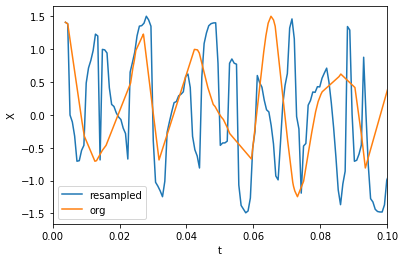

In [37]:
#plotting the data and resampled data:

plt.xlim(0, 0.1)
plt.plot(t_new, X_new, label="resampled")
plt.plot(ts, Xs, label="org")
plt.legend()
plt.ylabel("X")
plt.xlabel("t")

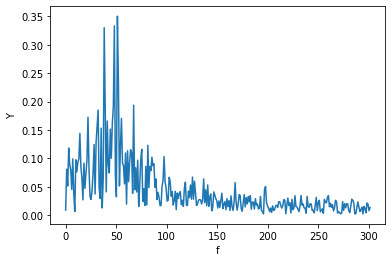

In [38]:
#now calculating the fft:

Y = scipy.fftpack.fft(X_new)
P2 = np.abs(Y / N)
P1 = P2[0 : N // 2 + 1]
P1[1 : -2] = 2 * P1[1 : -2]

plt.ylabel("Y")
plt.xlabel("f")
plt.plot(f, P1)

C:\Users\SESA94921\Anaconda3\lib\site-packages\ipykernel_launcher.py:18: UserWarning: signal prefered to be even in size, autoFixing it...


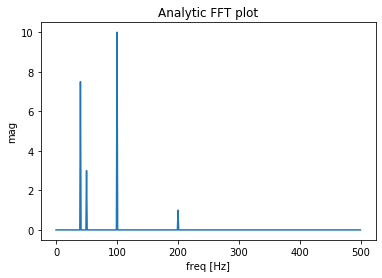

C:\Users\SESA94921\Anaconda3\lib\site-packages\ipykernel_launcher.py:18: UserWarning: signal prefered to be even in size, autoFixing it...


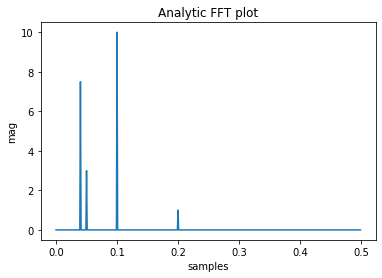

In [39]:
import matplotlib.pyplot as plt
import numpy as np
import warnings


def fftPlot(sig, dt=None, plot=True):
    # here it's assumes analytic signal (real signal...)- so only half of the axis is required

    if dt is None:
        dt = 1
        t = np.arange(0, sig.shape[-1])
        xLabel = 'samples'
    else:
        t = np.arange(0, sig.shape[-1]) * dt
        xLabel = 'freq [Hz]'

    if sig.shape[0] % 2 != 0:
        warnings.warn("signal prefered to be even in size, autoFixing it...")
        t = t[0:-1]
        sig = sig[0:-1]

    sigFFT = np.fft.fft(sig) / t.shape[0]  # divided by size t for coherent magnitude

    freq = np.fft.fftfreq(t.shape[0], d=dt)

    # plot analytic signal - right half of freq axis needed only...
    firstNegInd = np.argmax(freq < 0)
    freqAxisPos = freq[0:firstNegInd]
    sigFFTPos = 2 * sigFFT[0:firstNegInd]  # *2 because of magnitude of analytic signal

    if plot:
        plt.figure()
        plt.plot(freqAxisPos, np.abs(sigFFTPos))
        plt.xlabel(xLabel)
        plt.ylabel('mag')
        plt.title('Analytic FFT plot')
        plt.show()

    return sigFFTPos, freqAxisPos


if __name__ == "__main__":
    dt = 1 / 1000

    # build a signal within nyquist - the result will be the positive FFT with actual magnitude
    f0 = 200  # [Hz]
    t = np.arange(0, 1 + dt, dt)
    sig = 1 * np.sin(2 * np.pi * f0 * t) + \
        10 * np.sin(2 * np.pi * f0 / 2 * t) + \
        3 * np.sin(2 * np.pi * f0 / 4 * t) +\
        7.5 * np.sin(2 * np.pi * f0 / 5 * t)

    # res in freqs
    fftPlot(sig, dt=dt)
    # res in samples (if freqs axis is unknown)
    fftPlot(sig)

SyntaxError: invalid syntax (<ipython-input-41-27ecf7259558>, line 3)